In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix(cm):

    fig = plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for Model")
    plt.xlabel("Predicted class")
    plt.ylabel("True class")

In [3]:
df = pd.read_csv("../../Data/Neonatal.csv")
df.head()
df_x = df.iloc[:, :-1]
df_y = df.iloc[:, -1]
all_columns = df.columns.to_list()
print(all_columns)

['sex', 'birth_weight_kg', 'onset_age_in_days', 'onset_hour_of_day', 'stat_abx', 'intubated_at_time_of_sepsis_evaluation', 'inotrope_at_time_of_sepsis_eval', 'central_venous_line', 'umbilical_arterial_line', 'ecmo', 'temp_celsius', 'comorbidity_necrotizing_enterocolitis', 'comorbidity_chronic_lung_disease', 'comorbidity_cardiac', 'comorbidity_surgical', 'comorbidity_ivh_or_shunt', 'sepsis_binary']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
        df_x, df_y, test_size=0.3, random_state=42
    )

In [5]:
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7bd40a63b0>
Traceback (most recent call last):
  File "/home/afrodisiac/miniconda3/envs/roche/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/afrodisiac/miniconda3/envs/roche/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/afrodisiac/miniconda3/envs/roche/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/afrodisiac/miniconda3/envs/roche/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [6]:
# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)

In [7]:
pipe = make_pipeline(StandardScaler(), XGBClassifier(eval_metric="mlogloss"))

In [8]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [9]:
pipe.score(X_test, y_test)

0.7911025145067698

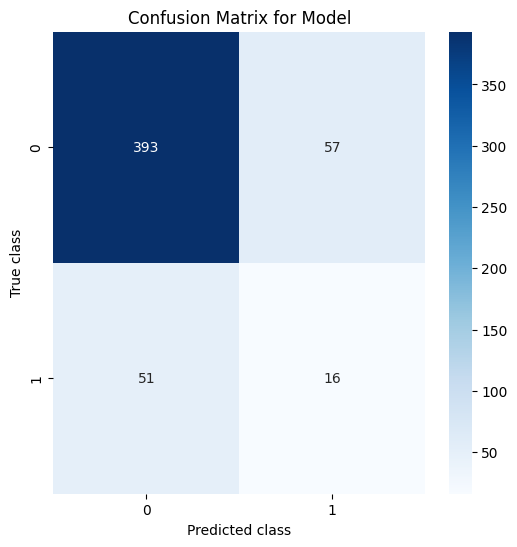

In [10]:
y_pred = pipe.predict(X_test)

# Berechne die Confusion Matrix und zeige sie an
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [11]:
import os

os.listdir("../models/")

['test.pkl', 'saved_model.pkl']